# Data Recording

In [8]:
import serial
import time
import csv

# Adjust the port and baud rate based on your configuration
port = 'COM3'  # Change this to your serial port
baud_rate = 115200  # Adjust according to your device
threshold = 0  # Adjusting it

# 函数用于处理阈值逻辑
def process_signal(signal, threshold):
    signal = float(signal)  # transfering signals to float
    if -threshold <= signal <= threshold:
        return 0  
    elif signal > threshold:
        return signal - threshold  
    else:
        return signal + threshold  

# Open the serial connection
ser = serial.Serial(port, baudrate=baud_rate, timeout=1)

# Give some time for the connection to establish
time.sleep(2)

print("Listening on serial port...")

# Open a CSV file for writing
with open('emg_data_cleaned.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["EMG Raw", "Signal", "Detect"])  # Write the header

    # Read and process serial data in real time
    try:
        while True:
            if ser.in_waiting > 0:  # Check if there is incoming data
                # Read a line from the serial monitor
                line = ser.readline().decode('utf-8', errors='ignore').strip()  # Handle invalid characters
                if line:  # If the line is not empty
                    try:
                        # Clean and split the CSV data
                        emg_raw, signal, detect = line.split(",")

                        
                        processed_signal = process_signal(signal, threshold)

                        # Write all the data (with threshold processing)
                        print(f"EMG Raw: {emg_raw}, Signal (processed): {processed_signal}, Detect: {detect}")
                        writer.writerow([emg_raw, processed_signal, detect])  # Write the data to CSV
                    except ValueError:
                        print(f"Failed to parse line: {line}")  # Handle lines that don't have the expected format
    except KeyboardInterrupt:
        print("Serial reading stopped.")
    finally:
        ser.close()  # Close the serial connection when done
        print("Serial connection closed.")


Listening on serial port...
Failed to parse line: 0,0
Failed to parse line: -36bb
EMG Raw: -357, Signal (processed): 0, Detect: 0
EMG Raw: -323, Signal (processed): 0, Detect: 0
EMG Raw: -330, Signal (processed): 0, Detect: 0
EMG Raw: -368, Signal (processed): 0, Detect: 0
EMG Raw: -381, Signal (processed): 0, Detect: 0
EMG Raw: -342, Signal (processed): 0, Detect: 0
EMG Raw: -285, Signal (processed): 0, Detect: 0
EMG Raw: -263, Signal (processed): 0, Detect: 0
EMG Raw: -299, Signal (processed): 0, Detect: 0
EMG Raw: -364, Signal (processed): 0, Detect: 0
EMG Raw: -414, Signal (processed): 0, Detect: 0
EMG Raw: -415, Signal (processed): 0, Detect: 0
EMG Raw: -36bb-337, Signal (processed): 0, Detect: 0
EMG Raw: -337, Signal (processed): 0, Detect: 0
EMG Raw: -337, Signal (processed): 0, Detect: 0
EMG Raw: -336, Signal (processed): 0, Detect: 0
EMG Raw: -332, Signal (processed): 0, Detect: 0
EMG Raw: -334, Signal (processed): 0, Detect: 0
EMG Raw: -353, Signal (processed): 0, Detect: 0
E

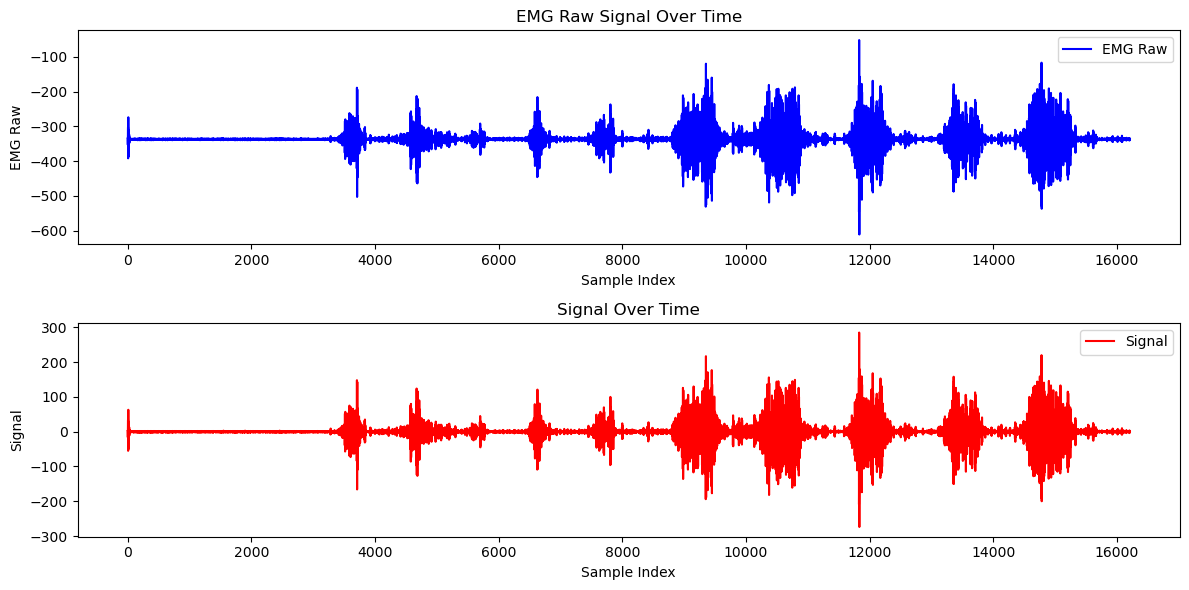

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'emg_data_cleaned.csv'  # Update this with the correct file path
data = pd.read_csv(file_path)

# Convert columns to appropriate data types if needed
data['EMG Raw'] = pd.to_numeric(data['EMG Raw'], errors='coerce')
data['Signal'] = pd.to_numeric(data['Signal'], errors='coerce')

# Create a time or index series
data['Time'] = range(len(data))  # Create an index to act as the x-axis

# Plotting the data
plt.figure(figsize=(12, 6))

# Plot EMG Raw Data
plt.subplot(2, 1, 1)
plt.plot(data['Time'], data['EMG Raw'], label='EMG Raw', color='blue')
plt.xlabel('Sample Index')
plt.ylabel('EMG Raw')
plt.title('EMG Raw Signal Over Time')
plt.legend()

# Plot Signal Data
plt.subplot(2, 1, 2)
plt.plot(data['Time'], data['Signal'], label='Signal', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Signal')
plt.title('Signal Over Time')
plt.legend()

plt.tight_layout()
plt.show()


# Data Analysis for the recorded csv
## First we would like to find the impulses

C:\Users\Zihan Liu\AppData\Local\Temp\ipykernel_15092\3764630778.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emg_signal[0]=-377


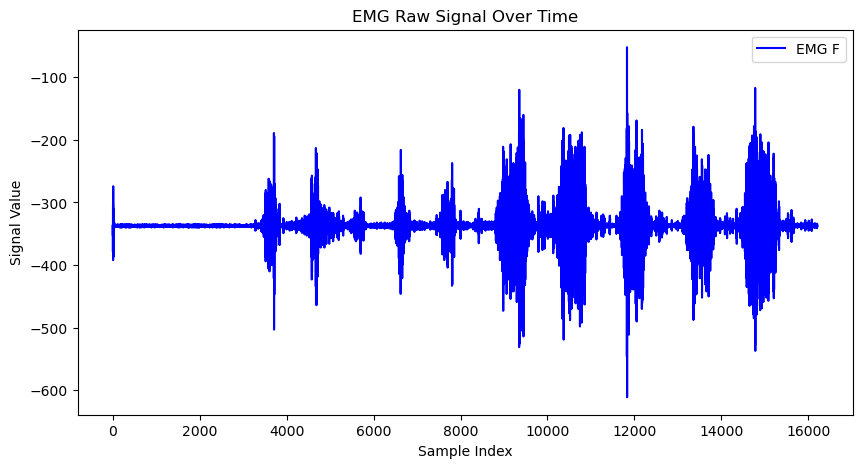

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'C:\\Users\\Zihan Liu\\emg_data_cleaned.csv'
data = pd.read_csv(file_path,sep=",",encoding='ISO-8859-1')


# Assuming the data has a column for the EMG signal, modify the column name accordingly
emg_signal = data['EMG Raw']
emg_signal[0]=-377
# Plot the raw EMG signal
plt.figure(figsize=(10, 5))
plt.plot(emg_signal, color='blue', label='EMG F')
plt.title('EMG Raw Signal Over Time')
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.legend()
plt.show()

## Find the peaks of the graph

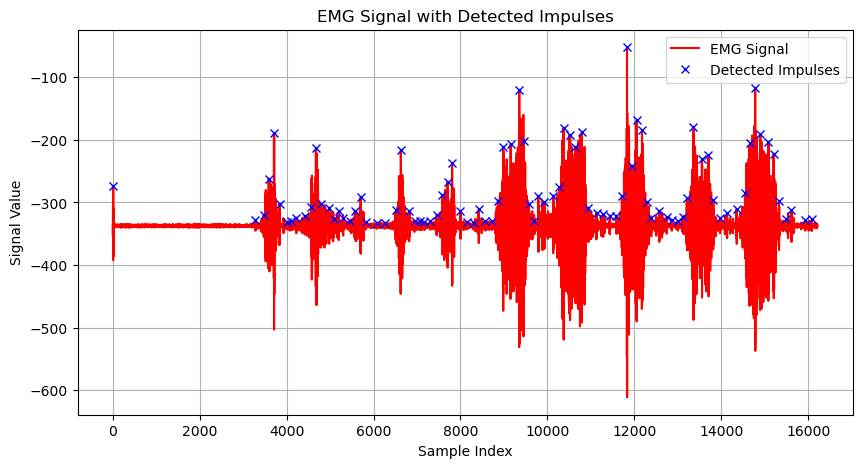

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Load the data
file_path = 'C:\\Users\\Zihan Liu\\emg_data_cleaned.csv'
data = pd.read_csv(file_path)

# Assuming the EMG signal is in a specific column, modify the column name accordingly
emg_signal = pd.to_numeric(data['EMG Raw'], errors='coerce')

# Drop any NaN values that may have been introduced
emg_signal = emg_signal.dropna()

# Create the x-axis values (sample indices)
x = np.linspace(0, len(emg_signal), len(emg_signal))

# Detecting the peaks (impulses)
peaks, _ = find_peaks(emg_signal, height=None, distance=100, prominence=10)

# Plot the raw EMG signal
plt.figure(figsize=(10, 5))
plt.plot(x, emg_signal, color='red', label='EMG Signal')

# Mark the detected impulses with "x"
plt.plot(x[peaks], emg_signal.iloc[peaks], "x", label='Detected Impulses', color='blue')

# Add labels and title
plt.title('EMG Signal with Detected Impulses')
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.legend()
plt.grid(True)

plt.show()


## Improved Version to narrow down the peaks

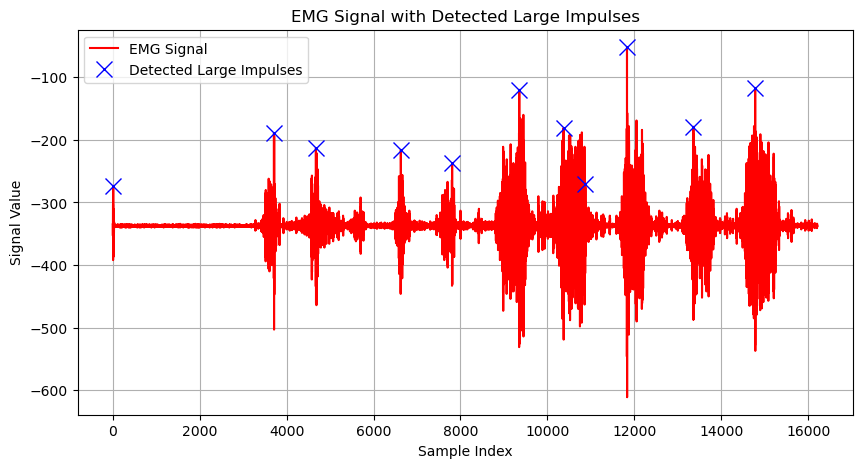

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Load the data
file_path = 'C:\\Users\\Zihan Liu\\emg_data_cleaned.csv'
data = pd.read_csv(file_path)

# Assuming the EMG signal is in a specific column, modify the column name accordingly
emg_signal = pd.to_numeric(data['EMG Raw'], errors='coerce')

# Drop any NaN values that may have been introduced
emg_signal = emg_signal.dropna()

# Create the x-axis values (sample indices)
x = np.linspace(0, len(emg_signal), len(emg_signal))

# Detect the large peaks (impulses) by setting a high prominence and distance
peaks, _ = find_peaks(emg_signal, height=None, distance=500, prominence=100)  # Adjust prominence and distance

# Plot the raw EMG signal
plt.figure(figsize=(10, 5))
plt.plot(x, emg_signal, color='red', label='EMG Signal')

# Mark the detected large impulses with "x"
plt.plot(x[peaks], emg_signal.iloc[peaks], "x", label='Detected Large Impulses', color='blue',markersize=12)

# Add labels and title
plt.title('EMG Signal with Detected Large Impulses')
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.legend()
plt.grid(True)

plt.show()


## Gaining the starting and ending points of each impulse

Start Points (Indices): [9, 3706, 4671, 6625, 7805, 9349, 10368, 10869, 11828, 13356, 14777]
Start Points (Values): [-376 -400 -434 -427 -433 -531 -472 -406 -515 -418 -473]
Stop Points (Indices): [13, 3710, 4675, 6630, 7810, 9355, 10372, 10874, 11832, 13360, 14781]
Stop Points (Values): [-368 -452 -395 -444 -431 -526 -418 -372 -508 -487 -469]


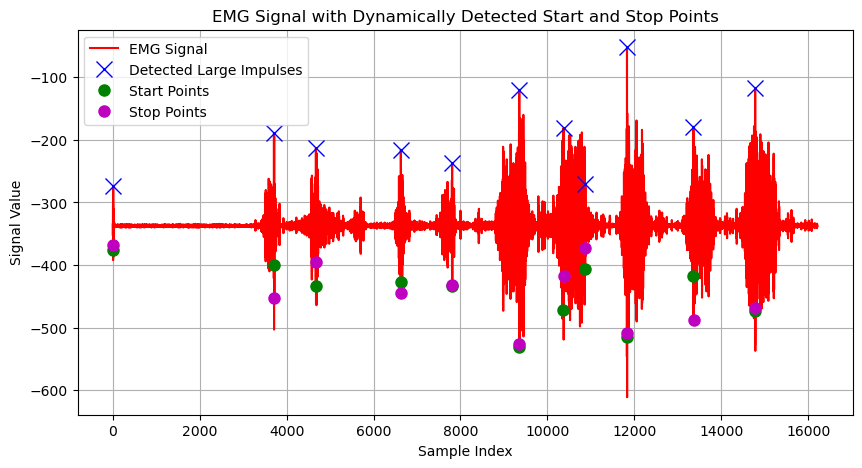

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Load the data
file_path = 'C:\\Users\\Zihan Liu\\emg_data_cleaned.csv'
data = pd.read_csv(file_path)

# Assuming the EMG signal is in a specific column, modify the column name accordingly
emg_signal = pd.to_numeric(data['EMG Raw'], errors='coerce')

# Drop any NaN values that may have been introduced
emg_signal = emg_signal.dropna()

# Create the x-axis values (sample indices)
x = np.linspace(0, len(emg_signal), len(emg_signal))

# Detect the large peaks (impulses) by setting a high prominence and distance
peaks, _ = find_peaks(emg_signal, height=None, distance=500, prominence=100)  # Adjust prominence and distance

# Calculate the gradient of the signal
gradient = np.gradient(emg_signal)

# Find start and stop points dynamically by detecting changes in the gradient
start_points = []
stop_points = []

for peak in peaks:
    # Search for the start point before the peak (look for significant changes in the gradient)
    for i in range(peak, 0, -1):
        if gradient[i] > gradient[i-1] and gradient[i-1] <= 0:
            start_points.append(i)
            break

    # Search for the stop point after the peak (look for significant changes in the gradient)
    for i in range(peak, len(gradient) - 1):
        if gradient[i] < gradient[i+1] and gradient[i+1] >= 0:
            stop_points.append(i)
            break

# Print detected start and stop points
print("Start Points (Indices):", start_points)
print("Start Points (Values):", emg_signal.iloc[start_points].values)

print("Stop Points (Indices):", stop_points)
print("Stop Points (Values):", emg_signal.iloc[stop_points].values)

# Plot the raw EMG signal
plt.figure(figsize=(10, 5))
plt.plot(x, emg_signal, color='red', label='EMG Signal')

# Mark the detected large impulses with "x", making them larger
plt.plot(x[peaks], emg_signal.iloc[peaks], "x", label='Detected Large Impulses', color='blue', markersize=12)

# Mark start and stop points with different markers
plt.plot(x[start_points], emg_signal.iloc[start_points], 'go', label='Start Points', markersize=8)
plt.plot(x[stop_points], emg_signal.iloc[stop_points], 'mo', label='Stop Points', markersize=8)

# Add labels and title
plt.title('EMG Signal with Dynamically Detected Start and Stop Points')
plt.xlabel('Sample Index')
plt.ylabel('Signal Value')
plt.legend()
plt.grid(True)

plt.show()


# Then we are going to connect this with the motor

In [4]:
import serial
import time
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Arduino configuration
arduino_port = 'COM3'  # Change this based on your system
baud_rate = 115200  # Adjust to match your device
threshold = 0  # Threshold for signal processing

def process_signal(signal, threshold):
    """Process signal to apply threshold logic."""
    signal = float(signal)
    if -threshold <= signal <= threshold:
        return 0
    elif signal > threshold:
        return signal - threshold
    else:
        return signal + threshold

# Establish serial connection with Arduino
ser = serial.Serial(arduino_port, baudrate=baud_rate, timeout=1)
# Allow some time for the connection to be established
time.sleep(2)
print("Listening on serial port...")

# Initialize variables to store real-time EMG data
emg_data = []

def write_to_motor(value):
    """Send control signal to motor through serial connection."""
    ser.write(bytes(value + '\n', 'utf-8'))  # Send input followed by newline
    time.sleep(0.05)  # Small delay
    response = ser.readline().decode('utf-8').strip()  # Read the response
    return response

try:
    while True:
        if ser.in_waiting > 0:  # Check for incoming data
            # Read a line from the serial port
            line = ser.readline().decode('utf-8', errors='ignore').strip()
            if line:
                try:
                    # Parse the EMG signal data
                    emg_raw, signal, detect = line.split(",")
                    processed_signal = process_signal(signal, threshold)
                    
                    # Store data for real-time analysis
                    emg_data.append(float(emg_raw))
                    
                    # Real-time analysis to detect peaks and control motor
                    if len(emg_data) >= 500:  # Process data every 500 samples
                        emg_signal = pd.Series(emg_data[-500:])
                        emg_signal = emg_signal.dropna()

                        # Detect large peaks (impulses) using prominence
                        peaks, _ = find_peaks(emg_signal, height=None, distance=50, prominence=100)

                        # Calculate gradient of signal
                        gradient = np.gradient(emg_signal)

                        # Detect start and stop points
                        for peak in peaks:
                            # Find start point before peak
                            start_point = None
                            for i in range(peak, 0, -1):
                                if gradient[i] > gradient[i - 1] and gradient[i - 1] <= 0:
                                    start_point = i
                                    break

                            # Find stop point after peak
                            stop_point = None
                            for i in range(peak, len(gradient) - 1):
                                if gradient[i] < gradient[i + 1] and gradient[i + 1] >= 0:
                                    stop_point = i
                                    break

                            # Control motor at start/stop points
                            if start_point:
                                print(f"Start Point Detected at Index: {start_point}")
                                write_to_motor('119')  # Send value to start motor
                            if stop_point:
                                print(f"Stop Point Detected at Index: {stop_point}")
                                write_to_motor('89')  # Send value to stop motor
                                write_to_motor('110')  # Send value to rotate counterclockwise briefly after stopping  # Send value to stop motor
                
                    # Print the data
                    print(f"EMG Raw: {emg_raw}, Signal (processed): {processed_signal}, Detect: {detect}")
                except ValueError:
                    print(f"Failed to parse line: {line}")  # Handle unexpected format
except KeyboardInterrupt:
    print("Serial reading stopped.")
finally:
    ser.close()  # Close the serial connection
    print("Serial connection closed.")

Listening on serial port...
EMG Raw: 268, Signal (processed): 0, Detect: 0
Failed to parse line: -25-337,0,0
EMG Raw: -336, Signal (processed): 0, Detect: 0
EMG Raw: -332, Signal (processed): 0, Detect: 0
EMG Raw: -335, Signal (processed): 0, Detect: 0
EMG Raw: -357, Signal (processed): 0, Detect: 0
EMG Raw: -374, Signal (processed): 0, Detect: 0
EMG Raw: -332, Signal (processed): 0, Detect: 0
EMG Raw: -250, Signal (processed): 0, Detect: 0
EMG Raw: -252, Signal (processed): 0, Detect: 0
EMG Raw: -391, Signal (processed): 0, Detect: 0
EMG Raw: -519, Signal (processed): 0, Detect: 0
EMG Raw: -439, Signal (processed): 0, Detect: 0
EMG Raw: -209, Signal (processed): 0, Detect: 0
EMG Raw: -112, Signal (processed): 0, Detect: 0
EMG Raw: -279, Signal (processed): 0, Detect: 0
EMG Raw: -487, Signal (processed): 0, Detect: 0
EMG Raw: -486, Signal (processed): 0, Detect: 0
EMG Raw: -339, Signal (processed): 0, Detect: 0
EMG Raw: -280, Signal (processed): 0, Detect: 0
EMG Raw: -333, Signal (proc

# Newer Combination

In [15]:
import serial
import time

# Adjust the port and baud rate based on your configuration
port = '/dev/cu.usbmodem1301'  # Change this to your serial port
baud_rate = 115200  # Adjust according to your device
threshold = 0  # Adjusting it

# Function to process the threshold logic
def process_signal(signal, threshold):
    signal = float(signal)  # Convert signals to float
    if -threshold <= signal <= threshold:
        return 0
    elif signal > threshold:
        return signal - threshold
    else:
        return signal + threshold

# Predefine the category
CATEGORY = "strong"  # Set the category before starting measurement ("strong", "medium", "small")

# Initialize a 2D array to store all sessions
data_storage = []

# Open the serial connection
ser = serial.Serial(port, baudrate=baud_rate, timeout=1)

# Give some time for the connection to establish
time.sleep(2)

print("Listening on serial port...")

# Start timing for 3 seconds
start_time = time.time()

# Temporary array to store data for this session
temp_array = [CATEGORY]

# Read and process serial data in real time
try:
    while time.time() - start_time < 3:  # Limit to 3 seconds
        if ser.in_waiting > 0:  # Check if there is incoming data
            # Read a line from the serial monitor
            line = ser.readline().decode('utf-8', errors='ignore').strip()  # Handle invalid characters
            if line:  # If the line is not empty
                try:
                    # Clean and split the incoming data
                    emg_raw, signal, detect = line.split(",")

                    # Filter out 0 or '0' values
                    if emg_raw != '0' and emg_raw != 0:
                        # Append only the raw data to the temporary array
                        temp_array.append(float(emg_raw))

                    # Print the data to confirm it's being stored
                    print(f"EMG Raw: {emg_raw}")
                except ValueError:
                    print(f"Failed to parse line: {line}")  # Handle lines that don't have the expected format
except KeyboardInterrupt:
    print("Serial reading stopped.")
finally:
    ser.close()  # Close the serial connection when done
    print("Serial connection closed.")

# Append the temp array to the main data storage
data_storage.append(temp_array)

# Print the final data storage array
print("Final Data Storage:")
print(data_storage)


Listening on serial port...
Threshold exceeded. EMG Raw: -337.0
EMG Raw: -337.0, Detect: 0
EMG Raw: 37.0, Detect: 0
Threshold exceeded. EMG Raw: -337.0
EMG Raw: -337.0, Detect: 0
Threshold exceeded. EMG Raw: -337.0
EMG Raw: -337.0, Detect: 0
Threshold exceeded. EMG Raw: -337.0
EMG Raw: -337.0, Detect: 0
Threshold exceeded. EMG Raw: -337.0
EMG Raw: -337.0, Detect: 0
Threshold exceeded. EMG Raw: -337.0
EMG Raw: -337.0, Detect: 0
Threshold exceeded. EMG Raw: -337.0
EMG Raw: -337.0, Detect: 0
Threshold exceeded. EMG Raw: -335.0
EMG Raw: -335.0, Detect: 0
Threshold exceeded. EMG Raw: -345.0
EMG Raw: -345.0, Detect: 0
Threshold exceeded. EMG Raw: -338.0
EMG Raw: -338.0, Detect: 0
Threshold exceeded. EMG Raw: -303.0
EMG Raw: -303.0, Detect: 0
Threshold exceeded. EMG Raw: -389.0
EMG Raw: -389.0, Detect: 0
Threshold exceeded. EMG Raw: -316.0
EMG Raw: -316.0, Detect: 0
Threshold exceeded. EMG Raw: -308.0
EMG Raw: -308.0, Detect: 0
Threshold exceeded. EMG Raw: -382.0
EMG Raw: -382.0, Detect: 0
Th

# Data Recording with catagory

In [24]:
data_storage = []

In [230]:
import serial
import time

# Adjust the port and baud rate based on your configuration
port = '/dev/cu.usbmodem1301'  # Change this to your serial port
baud_rate = 115200  # Adjust according to your device
threshold = 0  # Adjusting it

# Function to process the threshold logic
def process_signal(signal, threshold):
    signal = float(signal)  # Convert signals to float
    if -threshold <= signal <= threshold:
        return 0
    elif signal > threshold:
        return signal - threshold
    else:
        return signal + threshold

# Predefine the category
CATEGORY = "put"  # Set the category before starting measurement ("strong", "medium", "small","no force","hold","put")

# Initialize a 2D array to store all sessions
# data_storage = []

# Open the serial connection
ser = serial.Serial(port, baudrate=baud_rate, timeout=1)

# Give some time for the connection to establish
time.sleep(2)

print("Listening on serial port...")

# Start timing for 3 seconds
start_time = time.time()

# Temporary array to store data for this session
temp_array = [CATEGORY]

# Read and process serial data in real time
try:
    
    while time.time() - start_time < 3:  # Limit to 3 seconds
        if ser.in_waiting > 0:  # Check if there is incoming data
            # Read a line from the serial monitor
            line = ser.readline().decode('utf-8', errors='ignore').strip()  # Handle invalid characters
            if line:  # If the line is not empty
                try:
                    # Clean and split the incoming data
                    emg_raw, signal, detect = line.split(",")

                    # Filter out 0 or '0' values
                    if emg_raw != '0' and emg_raw != 0:
                        # Append only the raw data to the temporary array
                        temp_array.append(float(emg_raw))

                    # Print the data to confirm it's being stored
                    print(f"EMG Raw: {emg_raw}")
                except ValueError:
                    print(f"Failed to parse line: {line}")  # Handle lines that don't have the expected format
except KeyboardInterrupt:
    print("Serial reading stopped.")
finally:
    ser.close()  # Close the serial connection when done
    print("Serial connection closed.")

# Append the temp array to the main data storage
data_storage.append(temp_array)

# Print the final data storage array
print("Final Data Storage:")
print(data_storage)


Listening on serial port...
EMG Raw: -337
EMG Raw: -334
EMG Raw: -335
EMG Raw: -347
EMG Raw: -357
EMG Raw: -338
EMG Raw: -299
EMG Raw: -294
EMG Raw: -349
EMG Raw: -408
EMG Raw: -390
EMG Raw: -308
EMG Raw: -254
EMG Raw: -291
EMG Raw: -371
EMG Raw: -407
EMG Raw: -372
EMG Raw: -316
EMG Raw: -294
EMG Raw: -312
EMG Raw: -337
EMG Raw: -350
EMG Raw: -354
EMG Raw: -355
EMG Raw: -347
EMG Raw: -329
EMG Raw: -310
EMG Raw: -313
EMG Raw: -339
EMG Raw: -365
EMG Raw: -362
EMG Raw: -335
EMG Raw: -314
EMG Raw: -321
EMG Raw: -341
EMG Raw: -351
EMG Raw: -344
EMG Raw: -334
EMG Raw: -330
EMG Raw: -333
EMG Raw: -337
EMG Raw: -341
EMG Raw: -342
EMG Raw: -337
EMG Raw: -333
EMG Raw: -335
EMG Raw: -340
EMG Raw: -340
EMG Raw: -333
EMG Raw: -328
EMG Raw: -337
EMG Raw: -349
EMG Raw: -350
EMG Raw: -337
EMG Raw: -323
EMG Raw: -318
EMG Raw: -326
EMG Raw: -346
EMG Raw: -367
EMG Raw: -367
EMG Raw: -334
EMG Raw: -291
EMG Raw: -289
EMG Raw: -341
EMG Raw: -395
EMG Raw: -389
EMG Raw: -329
EMG Raw: -281
EMG Raw: -296
EMG Ra

EMG Raw: -263
EMG Raw: -298
EMG Raw: -377
EMG Raw: -409
EMG Raw: -359
EMG Raw: -292
EMG Raw: -283
EMG Raw: -332
EMG Raw: -374
EMG Raw: -369
EMG Raw: -337
EMG Raw: -318
EMG Raw: -324
EMG Raw: -336
EMG Raw: -337
EMG Raw: -337
EMG Raw: -346
EMG Raw: -355
EMG Raw: -344
EMG Raw: -320
EMG Raw: -310
EMG Raw: -328
EMG Raw: -353
EMG Raw: -360
EMG Raw: -346
EMG Raw: -334
EMG Raw: -330
EMG Raw: -328
EMG Raw: -322
EMG Raw: -323
EMG Raw: -342
EMG Raw: -371
EMG Raw: -374
EMG Raw: -337
EMG Raw: -289
EMG Raw: -287
EMG Raw: -341
EMG Raw: -393
EMG Raw: -377
EMG Raw: -310
EMG Raw: -278
EMG Raw: -332
EMG Raw: -404
EMG Raw: -389
EMG Raw: -292
EMG Raw: -237
EMG Raw: -309
EMG Raw: -425
EMG Raw: -441
EMG Raw: -335
EMG Raw: -233
EMG Raw: -254
EMG Raw: -364
EMG Raw: -434
EMG Raw: -390
EMG Raw: -297
EMG Raw: -263
EMG Raw: -314
EMG Raw: -377
EMG Raw: -381
EMG Raw: -338
EMG Raw: -310
EMG Raw: -319
EMG Raw: -342
EMG Raw: -350
EMG Raw: -342
EMG Raw: -333
EMG Raw: -329
EMG Raw: -337
EMG Raw: -348
EMG Raw: -345
EMG Ra

EMG Raw: -339
EMG Raw: -337
EMG Raw: -334
EMG Raw: -334
EMG Raw: -335
EMG Raw: -337
EMG Raw: -339
EMG Raw: -340
EMG Raw: -339
EMG Raw: -337
EMG Raw: -336
EMG Raw: -335
EMG Raw: -335
EMG Raw: -335
EMG Raw: -336
EMG Raw: -339
EMG Raw: -342
EMG Raw: -343
EMG Raw: -338
EMG Raw: -330
EMG Raw: -326
EMG Raw: -332
EMG Raw: -342
EMG Raw: -348
EMG Raw: -344
EMG Raw: -335
EMG Raw: -330
EMG Raw: -332
EMG Raw: -337
EMG Raw: -339
EMG Raw: -337
EMG Raw: -337
EMG Raw: -338
EMG Raw: -340
EMG Raw: -339
EMG Raw: -336
EMG Raw: -333
EMG Raw: -334
EMG Raw: -337
EMG Raw: -339
EMG Raw: -340
EMG Raw: -339
EMG Raw: -337
EMG Raw: -337
EMG Raw: -335
EMG Raw: -334
EMG Raw: -335
EMG Raw: -337
EMG Raw: -339
EMG Raw: -340
EMG Raw: -339
EMG Raw: -337
EMG Raw: -336
EMG Raw: -335
EMG Raw: -335
EMG Raw: -336
EMG Raw: -338
EMG Raw: -340
EMG Raw: -340
EMG Raw: -338
EMG Raw: -337
EMG Raw: -335
EMG Raw: -335
EMG Raw: -336
EMG Raw: -337
EMG Raw: -337
EMG Raw: -337
EMG Raw: -341
EMG Raw: -345
EMG Raw: -341
EMG Raw: -329
EMG Ra

EMG Raw: -338
EMG Raw: -339
EMG Raw: -339
EMG Raw: -338
EMG Raw: -337
EMG Raw: -336
EMG Raw: -334
EMG Raw: -335
EMG Raw: -337
EMG Raw: -339
EMG Raw: -341
EMG Raw: -340
EMG Raw: -337
EMG Raw: -335
EMG Raw: -334
EMG Raw: -334
EMG Raw: -337
EMG Raw: -338
EMG Raw: -340
EMG Raw: -340
EMG Raw: -338
EMG Raw: -336
EMG Raw: -334
EMG Raw: -334
EMG Raw: -336
EMG Raw: -337
EMG Raw: -339
EMG Raw: -340
EMG Raw: -339
EMG Raw: -337
EMG Raw: -334
EMG Raw: -333
EMG Raw: -335
EMG Raw: -337
EMG Raw: -339
EMG Raw: -341
EMG Raw: -340
EMG Raw: -337
EMG Raw: -334
EMG Raw: -333
EMG Raw: -335
EMG Raw: -337
EMG Raw: -339
EMG Raw: -340
EMG Raw: -339
EMG Raw: -337
EMG Raw: -336
EMG Raw: -335
EMG Raw: -335
EMG Raw: -336
EMG Raw: -337
EMG Raw: -339
EMG Raw: -340
EMG Raw: -339
EMG Raw: -337
EMG Raw: -335
EMG Raw: -334
EMG Raw: -335
EMG Raw: -337
EMG Raw: -339
EMG Raw: -340
EMG Raw: -340
EMG Raw: -337
EMG Raw: -335
EMG Raw: -334
EMG Raw: -334
EMG Raw: -337
EMG Raw: -338
EMG Raw: -340
EMG Raw: -340
EMG Raw: -338
EMG Ra

In [231]:
len(data_storage)

56

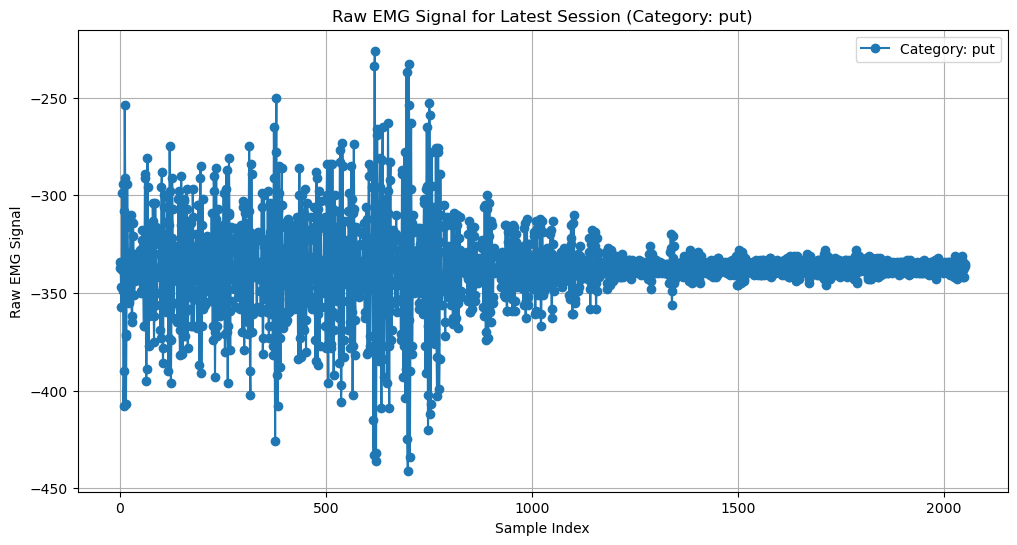

In [232]:
# Plotting the most recent session (index -1) from data_storage

# Extract the most recent session
latest_session = data_storage[-1]
category = latest_session[0]  # Category name
raw_data = latest_session[1:]  # Raw data values

# Plot the raw data of the latest session
plt.figure(figsize=(12, 6))
plt.plot(raw_data, label=f"Category: {category}", marker='o', linestyle='-')

# Set plot labels and title
plt.xlabel("Sample Index")
plt.ylabel("Raw EMG Signal")
plt.title(f"Raw EMG Signal for Latest Session (Category: {category})")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [173]:
del data_storage[-1]

In [233]:
import pickle

# Save the list to a binary file
file_name = "data_storage.bin"

with open(file_name, "wb") as file:
    pickle.dump(data_storage, file)

print(f"Data saved to {file_name}")

Data saved to data_storage.bin


In [234]:
# Load the list from the binary file
with open(file_name, "rb") as file:
    loaded_data_storage = pickle.load(file)

print("Data loaded from binary file:")
print(loaded_data_storage)

Data loaded from binary file:
[['no force', -348.0, -349.0, -343.0, -335.0, -327.0, -325.0, -334.0, -335.0, -345.0, -356.0, -343.0, -308.0, -293.0, -332.0, -389.0, -396.0, -339.0, -282.0, -284.0, -333.0, -372.0, -370.0, -347.0, -332.0, -328.0, -325.0, -322.0, -330.0, -345.0, -355.0, -350.0, -337.0, -330.0, -329.0, -330.0, -332.0, -335.0, -342.0, -347.0, -346.0, -340.0, -333.0, -328.0, -327.0, -332.0, -338.0, -346.0, -349.0, -345.0, -337.0, -328.0, -324.0, -328.0, -337.0, -345.0, -350.0, -348.0, -339.0, -329.0, -323.0, -326.0, -335.0, -344.0, -350.0, -349.0, -341.0, -332.0, -325.0, -325.0, -332.0, -341.0, -349.0, -349.0, -343.0, -335.0, -327.0, -325.0, -329.0, -337.0, -346.0, -350.0, -346.0, -337.0, -329.0, -324.0, -327.0, -335.0, -343.0, -349.0, -348.0, -341.0, -332.0, -325.0, -325.0, -332.0, -341.0, -348.0, -349.0, -344.0, -336.0, -327.0, -324.0, -329.0, -337.0, -346.0, -350.0, -347.0, -338.0, -329.0, -324.0, -326.0, -335.0, -343.0, -349.0, -348.0, -341.0, -332.0, -325.0, -325.0, -331

In [235]:
len(loaded_data_storage)

56